In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# read file data

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\Credit_Scoring (2).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


# check data lack

In [5]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

# show people not monthly in come

In [6]:
df[df['MonthlyIncome'].isna() == True]['age'].unique()

array([ 27,  78,  62,  81,  43,  72,  67,  58,  52,  48,  61,  74,  68,
        39,  63,  38,  29,  35,  65,  55,  86,  49,  60,  64,  50,  66,
        28,  42,  54,  57,  56,  92,  47,  71,  40,  46,  79,  22,  90,
        83,  59,  70,  33,  97,  34,  91,  82,  24,  45,  69,  30,  53,
        51,  75,  36,  41,  76,  87,  73,  85,  32,  44,  80,  77,  26,
        84,  31,  37,  88,  89,  21,  25,  23,  93,  96,  99,  94,  95,
       101,  98, 107, 105, 102, 109, 103], dtype=int64)

In [7]:
df[df['MonthlyIncome'].isna() == True]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
8,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
24,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
33,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
44,53,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149968,149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149969,149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149976,149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149984,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


# to replace lack by columns

In [19]:
df2 = df.fillna(df.interpolate(), axis = 1)

In [20]:
df2.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      1
dtype: int64

# graph boxplot

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

<AxesSubplot:xlabel='NumberOfTimes90DaysLate'>

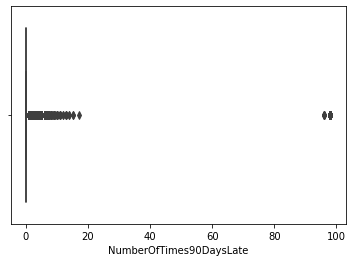

In [24]:
sns.boxplot(x =  df['NumberOfTimes90DaysLate'])

# handle data 

In [28]:
df[df['NumberOfTimes90DaysLate'] > 80]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1725,1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2278,2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3876,3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4409,4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4697,4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147766,147775,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149145,149154,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149231,149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0
149431,149440,1,1.0,34,98,9.0,NaN,0,98,0,98,0.0


<AxesSubplot:ylabel='Density'>

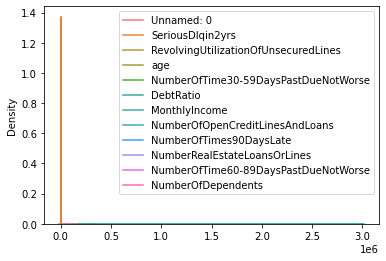

In [46]:
sns.kdeplot(data = df)

+ use MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
df_s = scaler.fit_transform(df)

In [49]:
df_s

array([[0.00000000e+00, 0.00000000e+00, 2.30635489e-06, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [6.66706669e-06, 0.00000000e+00, 3.73055636e-06, ...,
        7.40740741e-02, 0.00000000e+00, 1.00000000e-01],
       [1.33341334e-05, 0.00000000e+00, 1.27046218e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99986666e-01, 0.00000000e+00, 4.85217161e-06, ...,
        1.85185185e-02, 0.00000000e+00, 0.00000000e+00],
       [9.99993333e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.67682210e-05, ...,
        3.70370370e-02, 0.00000000e+00, 0.00000000e+00]])

In [50]:
col_names = list(df.columns)

In [51]:
df_s = pd.DataFrame(data = df_s, columns = col_names)

In [52]:
df_s.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000000,0.0,2.306355e-06,0.247706,0.0,1.395360e-04,NaN,0.034483,0.0,0.000000,0.0,NaN
1,0.000007,0.0,3.730556e-06,0.522936,0.0,1.839118e-06,0.007872,0.155172,0.0,0.074074,0.0,0.1
2,0.000013,0.0,1.270462e-05,0.275229,0.0,9.387625e-07,0.000831,0.086207,0.0,0.000000,0.0,0.0
3,0.000020,0.0,3.707131e-07,0.467890,0.0,1.612335e-06,0.002161,0.120690,0.0,0.037037,0.0,0.1
4,0.000027,0.0,2.041464e-07,0.422018,0.0,9.050247e-07,0.004139,0.224138,0.0,0.037037,0.0,0.1


In [53]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  float64
 1   SeriousDlqin2yrs                      149992 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  float64
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  float64
 8   NumberOfTimes90DaysLate               149992 non-null  float64
 9   NumberRealEstateLoansOrLines          149992 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  float64
 11  

<AxesSubplot:ylabel='Density'>

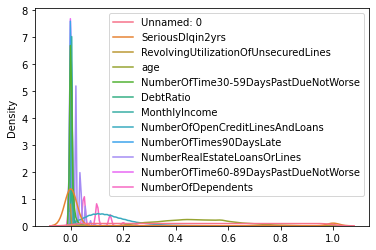

In [55]:
sns.kdeplot(data = df_s)